#YİNELEMELİ SİNİR AĞI KATMANLARININ OLUŞTURULMASI

In [17]:
from keras.layers import SimpleRNN

In [18]:
from keras.models import Sequential
from keras.layers import Embedding

In [19]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## BOYUTLANDIRILMIŞ RNN KATMANI

In [20]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## ARDIŞIK RNN KATMANI

In [21]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


## IMDB VERİ KÜMESİNİ HAZIRLAMAK

In [22]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [23]:
num_features = 1000
maxlen = 500
batch_size = 32

In [24]:
print("Load data...")
(input_train , y_train),(input_test,y_test) = imdb.load_data(num_words=num_features)

print(len(input_train),"eğitim verisi",input_train.shape)
print(len(input_test),"test verisi",input_test.shape)

Load data...
25000 eğitim verisi (25000,)
25000 test verisi (25000,)


In [25]:
print("pad sequence (sample x train)")
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print(len(input_train),"eğitim verisi",input_train.shape)
print(len(input_test),"test verisi",input_test.shape)

pad sequence (sample x train)
25000 eğitim verisi (25000, 500)
25000 test verisi (25000, 500)


## EMBEDDİNG VE SimpleRNN Katmanının eğitilmesi

In [26]:
from keras.layers import Dense
from keras import layers

### `BASİT RNN İLE MODELLEME`

In [31]:
modelRNN = Sequential()
modelRNN.add(Embedding(num_features,32))
modelRNN.add(SimpleRNN(32))
modelRNN.add(Dense(1,activation="sigmoid"))
modelRNN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          32000     
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


### BASİT LSTM İLE MODELLEME`

In [30]:
modelLSTM = Sequential()
modelLSTM.add(layers.Embedding(num_features,32))
modelLSTM.add(layers.Bidirectional(layers.LSTM(32)))
modelLSTM.add(Dense(1,activation="sigmoid"))
modelLSTM.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          32000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


### MODELİN DERLENMESİ RNN

In [33]:
modelRNN.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])
historyRNN = modelRNN.fit(input_train,y_train,
                    epochs = 10,
                    batch_size= 128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 27s 161ms/step - loss: 0.6579 - acc: 0.5957 - val_loss: 0.5993 - val_acc: 0.6902
Epoch 2/10
157/157 [==============================] - 25s 158ms/step - loss: 0.4988 - acc: 0.7711 - val_loss: 0.5440 - val_acc: 0.7268
Epoch 3/10
157/157 [==============================] - 25s 161ms/step - loss: 0.4404 - acc: 0.8094 - val_loss: 0.5242 - val_acc: 0.7378
Epoch 4/10
157/157 [==============================] - 25s 162ms/step - loss: 0.3861 - acc: 0.8342 - val_loss: 0.4042 - val_acc: 0.8314
Epoch 5/10
157/157 [==============================] - 26s 163ms/step - loss: 0.3604 - acc: 0.8458 - val_loss: 0.4215 - val_acc: 0.8226
Epoch 6/10
157/157 [==============================] - 25s 162ms/step - loss: 0.3399 - acc: 0.8577 - val_loss: 0.4076 - val_acc: 0.8322
Epoch 7/10
157/157 [==============================] - 25s 161ms/step - loss: 0.3186 - acc: 0.8677 - val_loss: 0.4678 - val_acc: 0.7886
Epoch 8/10
157/157 [==============================] - 2

### MODELİN DERLENMESİ LSTM

In [34]:
modelLSTM.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])
historyLSTM = modelLSTM.fit(input_train,y_train,
                    epochs = 10,
                    batch_size= 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 107s 659ms/step - loss: 0.6158 - acc: 0.6448 - val_loss: 0.6373 - val_acc: 0.6814
Epoch 2/10
157/157 [==============================] - 103s 657ms/step - loss: 0.4317 - acc: 0.8062 - val_loss: 0.3894 - val_acc: 0.8300
Epoch 3/10
157/157 [==============================] - 103s 653ms/step - loss: 0.3687 - acc: 0.8417 - val_loss: 0.3613 - val_acc: 0.8438
Epoch 4/10
157/157 [==============================] - 103s 657ms/step - loss: 0.3383 - acc: 0.8565 - val_loss: 0.3498 - val_acc: 0.8512
Epoch 5/10
157/157 [==============================] - 103s 654ms/step - loss: 0.3279 - acc: 0.8653 - val_loss: 0.3757 - val_acc: 0.8406
Epoch 6/10
157/157 [==============================] - 103s 653ms/step - loss: 0.3161 - acc: 0.8677 - val_loss: 0.3466 - val_acc: 0.8540
Epoch 7/10
157/157 [==============================] - 103s 657ms/step - loss: 0.3076 - acc: 0.8717 - val_loss: 0.4397 - val_acc: 0.8074
Epoch 8/10
157/157 [============================

## SONUCLARIN ÇİZDİRİLMESİ

In [35]:
import matplotlib.pyplot as plt


## RNN SONUÇLARININ ÇİZDİRİLMESİ

In [36]:
acc = historyRNN.history["acc"]
val_acc = historyRNN.history["val_acc"]
loss = historyRNN.history["loss"]
val_loss = historyRNN.history["val_loss"]

In [37]:
epoch = range(1,len(acc)+1)

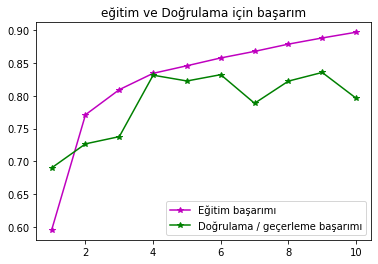

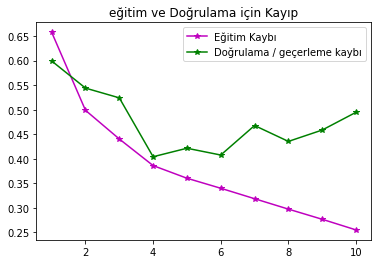

In [38]:
plt.plot(epoch,acc,"m*-",label="Eğitim başarımı")
plt.plot(epoch,val_acc,"g*-",label="Doğrulama / geçerleme başarımı")
plt.title("eğitim ve Doğrulama için başarım")
plt.legend()
plt.figure()

plt.plot(epoch,loss,"m*-",label="Eğitim Kaybı")
plt.plot(epoch,val_loss,"g*-",label="Doğrulama / geçerleme kaybı")
plt.title("eğitim ve Doğrulama için Kayıp")
plt.legend()
plt.show()

In [39]:
print(acc," Eğitim başarımları")

[0.5956500172615051, 0.7711499929428101, 0.8094000220298767, 0.8342499732971191, 0.84579998254776, 0.857699990272522, 0.8676999807357788, 0.8787500262260437, 0.8881499767303467, 0.8968499898910522]  Eğitim başarımları


## LSTM SOUÇLARININ ÇİZDİRİLMESİ

In [40]:
acc = historyLSTM.history["acc"]
val_acc = historyLSTM.history["val_acc"]
loss = historyLSTM.history["loss"]
val_loss = historyLSTM.history["val_loss"]

In [41]:
epoch = range(1,len(acc)+1)

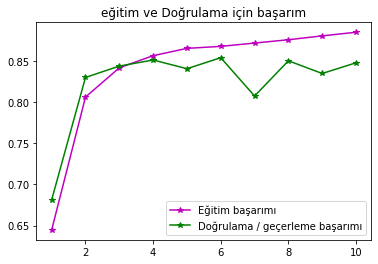

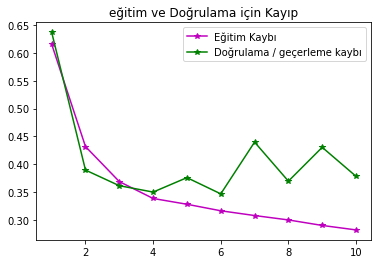

In [42]:
plt.plot(epoch,acc,"m*-",label="Eğitim başarımı")
plt.plot(epoch,val_acc,"g*-",label="Doğrulama / geçerleme başarımı")
plt.title("eğitim ve Doğrulama için başarım")
plt.legend()
plt.figure()

plt.plot(epoch,loss,"m*-",label="Eğitim Kaybı")
plt.plot(epoch,val_loss,"g*-",label="Doğrulama / geçerleme kaybı")
plt.title("eğitim ve Doğrulama için Kayıp")
plt.legend()
plt.show()

In [43]:
print(acc," Eğitim başarımları")

[0.6448000073432922, 0.8061500191688538, 0.84170001745224, 0.8564500212669373, 0.8652999997138977, 0.8677499890327454, 0.871749997138977, 0.8758000135421753, 0.8805000185966492, 0.8848999738693237]  Eğitim başarımları
